# ЕГЭ 2017 Вариант 2 &nbsp; &nbsp; &nbsp; EGE 2017 Variant 2
[ЕГЭ-2017. Информатика.10 тренировочных вариантов. Ушаков Д.М.](https://drive.google.com/file/d/0B6696ckkWj_zS2ptblAxNERHZzQ/view)

[Basic Regular Expressions in R Cheatsheet](https://www.rstudio.com/wp-content/uploads/2016/09/RegExCheatsheet.pdf)

[DataFlair: R Tutorials](https://data-flair.training/blogs/category/r/)

[Алгоритм Шеннона — Фано](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%A8%D0%B5%D0%BD%D0%BD%D0%BE%D0%BD%D0%B0_%E2%80%94_%D0%A4%D0%B0%D0%BD%D0%BE)

In [3]:
library(IRdisplay)
library(repr)
library(hash)
library(numbers)
library(e1071)
library(igraph)
library(VennDiagram)

In [4]:
# install.packages('')

In [5]:
answer_dictionary <- hash()

In [6]:
display_html("<style>
@import url('https://fonts.googleapis.com/css?family=Roboto');
body {background-color: aliceblue;} 
a {color: #4876ff; font-family: 'Roboto';} 
h1 {color: #348ABD; font-family: 'Roboto'; text-shadow: 4px 4px 4px #aaa;} 
h2, h3 {color: gray; font-family: 'Roboto'; text-shadow: 4px 4px 4px #aaa;}
h4 {color: #348ABD; font-family: 'Roboto';}
span {text-shadow: 4px 4px 4px #aaa;}
div.output_prompt, div.output_area pre, div.output_subarea {color: gray;}
div.input_prompt {color: #4876ff;}      
div.output_stderr pre {background-color: aliceblue;}  
div.output_stderr {background-color: gray;}                        
</style>")   

## Часть 1 &nbsp; &nbsp; &nbsp; Part 1

## 1.

Дано $A = 325_8$, $B = {D7}_{16}$. 

Укажите число С, записанное в двоичной системе счисления, которое отвечает условию А < С < В. 

Основание системы счисления указывать не нужно. 

(Например, если ответ должен быть $1100_2$, в ответе нужно записать $1100$.)

--- 

$ A = 325_8 $, $ B = {D7}_{16} $ are given. 

Specify the number C, written in the binary system, which corresponds to the condition A < C < B. 

The base of the number system should not be indicated. 

(For example, if the answer is $ 1100_2 $, you need to write $ 1100 $ in the answer.)

In [7]:
options(scipen = 999)
dec2bin <- function(n) {
  bv <- rep(0, 1 + floor(log(n, 2)))
  while (n >= 2) {
    pow <- floor(log(n, 2))
    bv[1 + pow] <- 1
    n <- n - 2^pow
  }
  bv[1] <- n %% 2
  paste(rev(bv), collapse = "")
}

In [8]:
# (325 _8)
A <- 3 * 8**2 + 2 * 8 ** 1 + 5 * 8 ** 0
A

[1] 213

In [9]:
# (D7 _16)
B <- 13 * 16**1 + 7 * 16 ** 0
B

[1] 215

In [10]:
dec2bin((A + B) / 2)

[1] "11010110"

In [11]:
answer_dictionary[1] <- dec2bin((A + B) / 2)

## 2.
Дан фрагмент таблицы истинности выражения F, зависящего от трёх аргументов X, Y, Z.

Перечислите в порядке возрастания без запятых и пробелов номера логических выражений, которые соответствуют F.

---

A fragment of the truth table of the expression F, depending on three arguments X, Y, Z, is given.

List in ascending order without commas and spaces the numbers of logical expressions that correspond to F.

| $X$ | $Y$ | $Z$ | $F$ |
|:-:|:-:|:-:|:-:|
| 0 | 1 | 1 | 1 |
| 1 | 0 | 1 | 0 |
| 1 | 1 | 0 | 1 |

$1) \ \neg X \lor Y \land Z \\ 
2) \ \neg X \land Y \land Z \\ 
3) \ \neg X \lor Y \land \neg Z \\ 
4) \ \neg X \land Y \lor \neg Z \\ 
5) \ X \lor Y \lor \neg Z$

In [12]:
bc <- matrix(c(0,1,1, 1,0,1, 1,1,0), nrow=3, ncol=3, byrow = TRUE)

F <- function(X, Y, Z, I) {
    if (I == 1) {return(!X | Y & Z)}
    if (I == 2) {return(!X & Y & Z)}
    if (I == 3) {return(!X | Y & !Z)}
    if (I == 4) {return(!X & Y | !Z)}    
    if (I == 5) {return(X | Y | !Z)}    
} 

In [13]:
for (i in 1:5){
    result = vector(length=3)
    for (j in 1:3) {result[j] = F(bc[j,1],bc[j,2],bc[j,3],i)}
    if (all(result == c(TRUE,FALSE,TRUE))){print(i)}
}

[1] 3
[1] 4


In [14]:
answer_dictionary[2] <- '34'

## 3.
В таблице приведена стоимость перевозок между соседними железнодорожными станциями. 

Перечислите в порядке возрастания, без пробелов и запятых, номера таблиц, соответствующих схеме.

---

The table shows the cost of transportation between neighboring railway stations. 

List in ascending order, without spaces or commas, the numbers of tables that are corresponding to the scheme.


| $1) $ | &#x123CF; | A | B | C | D | E | F |||$2)$ | &#x123CF; | A | B | C | D | E | F |
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
| | **A** | &#x123CF; | 3 |  |  |  | 2 ||| | **A** | &#x123CF; | 3 |  |  |  | 2 |
| | **B** | 3 | &#x123CF; | 3 | 5 |  | 4 ||| | **B** | 3 | &#x123CF; | 3 | 5 |  | 4 |
| | **C** |  | 3 | &#x123CF; | 3 | 5 |  ||| | **C** |  | 3 | &#x123CF; | 2 | 5 |  |
| | **D** |  |  | 3 | &#x123CF; | 2 |  ||| | **D** |  |  | 2 | &#x123CF; | 3 |  |
| | **E** |  | 5 | 5 | 2 | &#x123CF; |  ||| | **E** |  | 5 | 5 | 3 | &#x123CF; |  |
| | **F** | 2 | 4 |  |  |  | &#x123CF; ||| | **F** | 2 | 4 |  |  |  | &#x123CF; |

| $3) $ | &#x123CF; | A | B | C | D | E | F |||$4)$ | &#x123CF; | A | B | C | D | E | F |
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
| | **A** | &#x123CF; | 3 |  |  |  | 2 ||| | **A** | &#x123CF; | 3 |  |  |  | 2 |
| | **B** | 3 | &#x123CF; | 3 | 5 |  | 4 ||| | **B** | 3 | &#x123CF; | 3 | 5 |  | 4 |
| | **C** |  | 3 | &#x123CF; | 2 | 5 |  ||| | **C** |  | 3 | &#x123CF; | 2 | 3 |  |
| | **D** |  |  | 2 | &#x123CF; |  |  ||| | **D** |  |  | 2 | &#x123CF; | 5 |  |
| | **E** |  | 5 | 5 |  | &#x123CF; | 3 ||| | **E** |  | 5 | 3 | 5 | &#x123CF; |  |
| | **F** | 2 | 4 |  |  | 3 | &#x123CF; ||| | **F** | 2 | 4 |  |  |  | &#x123CF; |

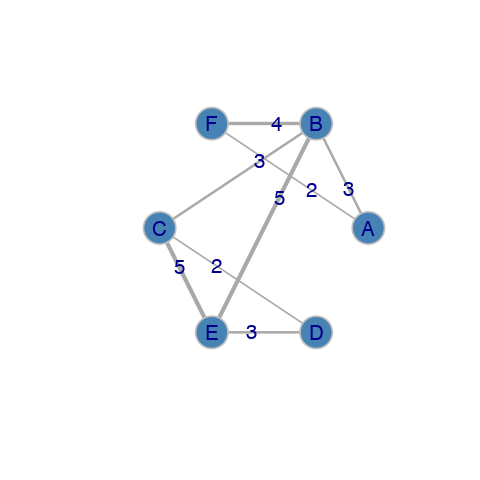

In [15]:
options(repr.plot.width=4,repr.plot.height=4)
edges <- c('A','B','A','F','B','C','B','E','B','F',
           'C','D','C','E','D','E')
weights <- c(3,2,3,5,4,2,5,3)
g <- graph(edges, directed=FALSE)%>%
    set_edge_attr("weight", value=weights)
plot(g, layout=layout_in_circle(g),
     vertex.color="steelblue",vertex.size=30,vertex.frame.color="gray",
     edge.label=E(g)$weight,edge.width=E(g)$weight/2)

In [16]:
adjm <- get.adjacency(g, attr="weight",sparse=FALSE)
adjm[sort(rownames(adjm)),sort(colnames(adjm))]

,A,B,C,D,E,F
A,0,3,0,0,0,2
B,3,0,3,0,5,4
C,0,3,0,2,5,0
D,0,0,2,0,3,0
E,0,5,5,3,0,0
F,2,4,0,0,0,0


In [17]:
answer_dictionary[3] <- '2'

## 4.
В каталоге находятся шесть файлов. / There are six files in the directory.

| 1 | 2 | 3 | 4 | 5 | 6 |
|:-:|:-:|:-:|:-:|:-:|:-:|
| ask.c | kasko.cpp | kraska.doc | nebraska.docx | mask.pic | laska.dpr |

Ниже представлено восемь масок. / Bellow, you can see eight masks.

|  |  |  |  |
|:-:|:-:|:-:|:-:|
| `?ask*.???*` | `*ask*.*c*` | `*as??.*c*` | `*ask*.???` |
| `*a*a*.*d*` | `*aska*.?*?` | `?????*.???` | `?s*k?.*` |
Сколько из них таких, которым соответствует ровно три файла из данного каталога?

How many of them are those to which exactly three files from this catalog correspond?

In [41]:
file_list <- c('ask.c', 'kasko.cpp', 'kraska.doc', 
               'nebraska.docx', 'mask.pic', 'laska.dpr')
mask_list <- c('?ask*.???*', '*ask*.*c*', '*as??.*c*', '*ask*.???',
               '*a*a*.*d*', '*aska*.?*?', '?????*.???', '?s*k?.*')

df <- data.frame(file_list=file_list,
                 mask_1=grepl("^.ask.*\\.....*$",file_list), 
                 mask_2=grepl("^.*ask.*\\..*c.*$", file_list), 
                 mask_3=grepl("^.*as..\\..*c.*$", file_list), 
                 mask_4=grepl("^.*ask.*\\....$", file_list),
                 mask_5=grepl("^.*a.*a.*\\..*d.*$",file_list), 
                 mask_6=grepl("^.*aska.*\\...*.$", file_list), 
                 mask_7=grepl("^......*\\....$", file_list), 
                 mask_8=grepl("^.s.*k.\\..*$", file_list))
df 

file_list,mask_1,mask_2,mask_3,mask_4,mask_5,mask_6,mask_7,mask_8
ask.c,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
kasko.cpp,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,TRUE,FALSE
kraska.doc,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE
nebraska.docx,FALSE,TRUE,TRUE,FALSE,TRUE,TRUE,FALSE,FALSE
mask.pic,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE
laska.dpr,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,FALSE


In [44]:
c <- 0
for (i in 2:9) {
    print(mask_list[i-1]); 
    print(length(df[1:6,i][df[1:6,i]==TRUE]))
    if (length(df[1:6,i][df[1:6,i]==TRUE]) == 3) {c <- c + 1}
}

c

[1] "?ask*.???*"
[1] 3
[1] "*ask*.*c*"
[1] 5
[1] "*as??.*c*"
[1] 3
[1] "*ask*.???"
[1] 4
[1] "*a*a*.*d*"
[1] 3
[1] "*aska*.?*?"
[1] 3
[1] "?????*.???"
[1] 3
[1] "?s*k?.*"
[1] 0


[1] 5

In [45]:
answer_dictionary[4] <- toString(c)

## 5.
Для 5 букв латинского алфавита заданы их двоичные коды. Эти коды представлены в таблице. 

For 5 letters of the Latin alphabet their binary codes are given. These codes are presented in the table.

| A | B | C | D | E |
|:-:|:-:|:-:|:-:|:-:|
| `00` | `100` | `110` | `01` | `101` |

Определите, какой набор букв закодирован двоичной последовательностью `110011000011010101`. 

В ответе запишите последовательность букв без запятых.

Determine which set of letters is encoded with the binary sequence `110011000011010101`. 

In the answer, write down the sequence of letters without commas.

In [47]:
string <- '110011000011010101'
fragments <- c('00','100','110','01','101')
letters <- c('A','B','C','D','E')
result <- ''

while (string !='') {
    for (i in 1:5){
        if (substr(string,1,2) == fragments[i]) {
            result <- paste(result,letters[i],sep="")
            string <- substring(string,first=3,last=nchar(string))
        }
        if (substr(string,1,3) == fragments[i]) {
            result <- paste(result,letters[i],sep="")
            string <- substring(string,first=4,last=nchar(string))
        }
    }
}

result

[1] "CDBACED"

In [48]:
answer_dictionary[5] <- result

## 6.
Автомат получает на вход два двузначных шестнадцатеричных числа. 

В этих числах все цифры не превосходят цифру 6 (если в числе есть цифра больше 6, автомат отказывается работать). 

По этим числам строится новое шестнадцатеричное число по следующим правилам.

1. Вычисляются два шестнадцатеричных числа — сумма старших разрядов полученных чисел и сумма младших разрядов этих чисел.

2. Полученные два шестнадцатеричных числа записываются друг за другом в порядке убывания (без разделителей).

_Пример._ Исходные числа: 25, 66. Поразрядные суммы: 8, В. Результат: В8. 

Какие из предложенных чисел могут быть результатом работы автомата?

Перечислите в алфавитном порядке буквы, соответствующие этим числам, без пробелов и знаков препинания.

**A) 127 B) C6 C) BA D) E3 E) D1 **

---

The machine receives two two-digit hexadecimal numbers. 

In these numbers, all figures do not exceed 6 (if the number is greater than 6, the machine refuses to work). 

For these numbers, a new hexadecimal number is constructed according to the following rules.

1. Two hexadecimal numbers are calculated - the sum of the highest digits of the obtained numbers and the sum of the lowest digits of these numbers.

2. The received two hexadecimal numbers are written one after the other in descending order (without separators).

_Example._ Initial numbers: 25, 66. Bitwise sums: 8, B. Result: B8. 

Which of the suggested numbers can be the result of the operation of the machine?

List in alphabetical order the letters corresponding to these numbers, without spaces and punctuation marks.

**A) 127 B) C6 C) BA D) E3 E) D1**

Рассмотрим предложенные варианты:

- A) **127**
   - Цифры складываемых чисел не превышают $6_{10} \ ( 6_{16})$ => их поразрядные суммы не превышают $6_{10} + 6_{10} = 12_{10} \ ( 6_{16} + 6_{16} = C_{16} )$ => результат не может быть трехзначным в шестнадцатеричной системе.
   
- B) **C6** 
   - Возможный вариант сложения и перестановки цифр: $26_{16}$ и  $46_{16}$ поразрядно суммируются и получается пара $6_{16}, C_{16}$, затем цифры переставляются $C6_{16}$.
   
- C) **BA**  
   - Возможный вариант сложения и перестановки цифр: $55_{16}$ и  $56_{16}$ поразрядно суммируются и получается пара $A_{16}, B_{16}$, затем цифры переставляются $BA_{16}$.
   
- D) **E3**
  - $14_{10} \ ( E_{16})$ не может быть получена сложением двух цифр, не превышающих $6_{10} \ ( 6_{16})$.
  
- E) **D1**
  - $13_{10} \ ( D_{16})$ не может быть получена сложением двух цифр, не превышающих $6_{10} \ ( 6_{16})$.
  
---

Let's consider the offered variants:

- A) ** 127 **
    - The digits do not exceed $6_{10} \ (6_{16})$ => their bitwise sums do not exceed $6_{10} + 6_{10} = 12_{10} \ (6_{16} + 6_{ 16} = C_{16})$ => the result cannot be a three-digit number in the hexadecimal system.
    
- B) ** C6 **
    - A possible variant of adding and rearranging the numbers: $26_{16}$ and $46_{16}$ are digitally summed and the pair $6_{16}, C_{16}$ is obtained, then the digits are rearranged $C6_{16}$.
   
- C) ** BA **
    - A possible variant of adding and rearranging numbers: $55_{16}$ and $56_{16}$ are digitally summed and the pair $A_{16}, B_{16}$ is obtained, then the digits are rearranged $BA_{16}$.
    
- D) ** E3 **
   - $14_{10} \ (E_{16})$ cannot be obtained by adding two digits not exceeding $6_{10} \ (6_{16})$.
  
- E) **D1**
   - $13_{10} \ (D_{16})$ cannot be obtained by adding two digits not exceeding $6_{10} \ (6_{16})$.

In [49]:
answer_dictionary[6] <- 'BC'

## 7.
При работе с электронной таблицей в ячейку С3 записана формула: `=$B3+C$2`. 

Какой вид приобретёт формула, после того как ячейку С3 скопируют в ячейку D2?

---

When working with a spreadsheet, the following formula is written to cell C3: `=$B3+C$2`. 

What view will the formula get after the cell C3 is copied into the cell D2?

<div style="width: 800px; height: 300px; overflow:auto;">
    <img src="it_images/2017_02_07a.png" width="800" height="300"/>
</div>
[Google Sheet](https://drive.google.com/open?id=15cVwTSZcQXGLU83RAiDptIFrWVRgaBsS5YZ39uj8jwc)

In [50]:
answer_dictionary[7] <- '=$B2+D$2'

## 8.
Определите, что будет напечатано в результате выполнения следующего фрагмента программы.

<table style="width:95%;">
  <tr style="color:slategray;font-size:120%;font-family:'Roboto';">
    <th style="text-align:center;">Python</th> 
    <th style="text-align:center;">R</th>          
  </tr>
  <tr>
    <td style="font-weight:bold;text-align:left;"><pre><code class='python'>
k, s = 2, 8

while s < 500:
    s += 20
    k += 5
    
print(k)
    </code></pre></td> 
    <td style="font-weight:bold;text-align:left;"><pre><code class='r'> 

k <- 2
s <- 8

while (s < 500) {
    s <- s + 20 
    k <- k + 5 
}

print(k)
    </code></pre></td>     
  </tr>    
</table>

Determine what will be printed as a result of the next program fragment.

In [51]:
k <- 2
s <- 8

while (s < 500) {
    s <- s + 20 
    k <- k + 5 
}

print(k)

[1] 127


In [52]:
answer_dictionary[8] <- toString(k)

## 9.
Какой объём на диске (в Мбайт) будет занимать неупакованное $16$-цветное изображение, 

содержащее изображение размером $2048*1024$ пикселей? 

В ответе запишите только целое число, единицу измерения писать не нужно.

---

What volume on the disk (in Mbytes) will be occupied by the unpacked $16$-color image 

with the size of $2048 * 1024$ pixels? 

In the answer, write down only an integer, you do not need to write a unit of measurement.

1) $\log_{2}{16} = 4$ (бита) - необходимо для кодирования одного пикселя 16-цветного изображения.

2) $2048 * 1024 * 4 = 2^{11} * 2^{10} * 2^2 = 2^{23}$ (бита) - необходимо для кодирования изображения размером 2048 * 1024 пикселей.

3) $2^{23} \ / \ 2^{3} = 2^{20}$ (байта) - необходимо для кодирования изображения размером 2048 * 1024 пикселей.

4) $2^{20} \ / \ 2^{20} = 1$ (Mбайт) - необходимо для кодирования изображения размером 2048 * 1024 пикселей.

---

1) $\log_{2} {16} = 4$ (bit) - necessary to encode one pixel of the 16-color image.

2) $2048 * 1024 * 4 = 2^{11} * 2^{10} * 2^2 = 2^{23}$ (bit) - needed to encode an image with the size of 2048 * 1024 pixels.

3) $2^{23} \ / \ 2^{3} = 2^{20}$ (byte) - needed to encode an image with the size of 2048 * 1024 pixels.

4) $2^{20} \ / \ 2^{20} = 1$ (Mbytes) - needed to encode an image with the size of 2048 * 1024 pixels.

In [53]:
bits_for_one_pixel_16_colors <- log2(16)

bits_for_image_2048_1024 <- 2048 * 1024 * bits_for_one_pixel_16_colors

bytes_for_image_2048_1024 <- bits_for_image_2048_1024 / 2**3

Mbytes_for_image_2048_1024 <- bytes_for_image_2048_1024 / 2**20

bits_for_one_pixel_16_colors; bits_for_image_2048_1024

bytes_for_image_2048_1024; Mbytes_for_image_2048_1024

[1] 4

[1] 8388608

[1] 1048576

[1] 1

In [54]:
answer_dictionary[9] <- toString(Mbytes_for_image_2048_1024)

## 10.
Петя и Вася передают друг другу сообщения, используя трёхцветный фонарик. 

На фонарике имеется три кнопки, соответствующие цвету, 

которым будет светить фонарик (<i style="color:red;">красный</i>, <i style="color:green;">зелёный</i> и <i style="color:blue;">синий</i>). 
    
Две кнопки одновременно нажать нельзя. 

Для передачи сообщения мальчики последовательно нажимают одну из этих кнопок пять раз. 

Сколько различных сообщений могут передать мальчики?

---

Petya and Vasya transmit messages to each other using a tri-color flashlight. 

On the flashlight there are three buttons corresponding to the color 

that the flashlight will shine (<i style="color:red;">red</i>, <i style="color:green;">green</i> and <i style="color:blue;">blue</i>). 

Two buttons cannot be pressed simultaneously. 

To transmit the message, the boys consistently press one of these buttons five times. 

How many different messages can the boys transmit?

Каждый из 5 последовательных сигналов может принимать 

3 различных значения (<i style="color:red;">красный</i>, <i style="color:green;">зелёный</i> и <i style="color:blue;">синий</i>), независимо от других сигналов.

Значит, количество вариантов сообщений будет равно $3 * 3 * 3 * 3 * 3 = 3^{5} = 243$

---

Each of 5 consecutive signals can take 

3 different values (<i style="color:red;">red</i>, <i style="color:green;">green</i> and <i style="color:blue;">blue</i>), regardless of other signals.

Hence, the number of message variants will be equal to $3 * 3 * 3 * 3 * 3 = 3^{5} = 243$

In [55]:
answer_dictionary[10] <- toString(3 ** 5)

## 11.
Алгоритм вычисления значения функции `F(n)`, где `n` — натуральное число, задан следующими соотношениями:

- `F(n) = F(n - 1) + F(n - 2), при n > 2`

- `F(1) = F(2) = 1`

Чему равно значение функции `F(8)`?

(В ответе запишите только натуральное число.)

---

The algorithm for calculating the value of the function `F(n)`, where `n` is a natural number, is given by the following relations:

- `F(n) = F(n - 1) + F(n - 2), for n > 2`

- `F(1) = F(2) = 1`

What is the value of the function `F(8)`?

(In the answer write down only a positive integer number.)

In [56]:
F <- function(n) {
    if (n == 1 | n == 2) {return (1)}
    if (n > 2) {return (F(n - 1) + F(n - 2))}
}

F(8)

[1] 21

In [57]:
answer_dictionary[11] <- toString(F(8))

## 12.
Доступ к файлу `www.com`, находящемуся на сервере `http.txt`, осуществляется по протоколу `ftp`. 

В таблице фрагменты адреса файла закодированы буквами от А до G. 

Запишите последовательность этих букв, кодирующую адрес указанного файла.

| A | B | C | D | E | F | G |
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
| `://` | `www` | `.txt` | `http` | `ftp` | `.com` | `/` |

Access to the file `www.com`, located on the server `http.txt`, is performed using the `ftp` protocol. 

In the table, fragments of the file address are encoded with letters from A to G. 

Write down the sequence of these letters coding the address of the specified file.

In [60]:
address = 'ftp://http.txt/www.com'

fragments <- c('://','www','.txt','http','ftp','.com','/')
letters <- c('A','B','C','D','E','F','G')

for (i in 1:7){
    address <- gsub(fragments[i],letters[i],address)
}

address

[1] "EADCGBF"

In [61]:
answer_dictionary[12] <- address

## 13.
В велокроссе участвует 60 спортсменов. 

Автоматическое устройство кодирует номер каждого спортсмена минимально возможным и одинаково целым количеством бит. 

Финишировали 30 спортсменов. 

Определите информационный объём (в битах), отводимой памятью устройства для записи результатов всех финишировавших спортсменов.

---

In the bicycle marathon, 60 athletes participate. 

The automatic device encodes the number of each athlete with the minimum possible and equally integer number of bits.

30 athletes have reached the finish. 

Determine the information capacity (in bits) allocated by the device's memory to record the results of all athletes who have completed the marathon.

1) $5 < \log_{2}{60} < 6 \implies $  6 (бит) - необходимо для кодирования номера одного из 60 спортсменов.

Количество возможных вариантов кодировки ($2^6$) не должно быть меньше количества имеющейся информации ($60$ номеров), 

округление в данном случае - всегда в большую сторону.

2) $6 * 30 = 180$ (бит) - необходимо для кодирования номеров 30 спортсменов.

---

1) $5 < \log_{2}{60} < 6 \implies $ 6 (bit) - necessary to encode the number of one of 60 athletes.

The number of possible encoding options ($2^6$) should not be less than the amount of information available ($60$ numbers), 

rounding, in this case, is always on the larger side.

2) $6 * 30 = 180$ (bit) - necessary for encoding the numbers of 30 athletes.

In [68]:
log2(60); ceiling(log2(60)); ceiling(log2(60)) * 30

[1] 5.906891

[1] 6

[1] 180

In [65]:
answer_dictionary[13] <- toString(ceiling(log2(60)) * 30)

## 14.
Система команд исполнителя РОБОТ, «живущего» в прямоугольном лабиринте на клетчатой плоскости:

The command system of the performer ROBOT, "living" in a rectangular labyrinth on the grid plane:

<body>
<table border=4>
    <tr>
        <td colspan=4 style="text-align:center; color:red; font-size:120%;">вверх</td>
        <td colspan=4 style="text-align:center; color:green; font-size:120%;">вниз</td>
        <td colspan=4 style="text-align:center; color:red; font-size:120%;">влево</td>
        <td colspan=4 style="text-align:center; color:green; font-size:120%;">вправо</td>
    </tr>
    <tr>
        <td colspan=4 style="text-align:center; color:red; font-size:120%;">up</td>
        <td colspan=4 style="text-align:center; color:green; font-size:120%;">down</td>
        <td colspan=4 style="text-align:center; color:red; font-size:120%;">left</td>
        <td colspan=4 style="text-align:center; color:green; font-size:120%;">right</td>
    </tr>
</table >    
<p>При выполнении этих команд РОБОТ перемещается на одну клетку соответственно:</p>
<p>When these commands are executed, the ROBOT moves one cell accordingly:</p>
<table border=4>
    <tr>
        <td colspan=4 style="text-align:center; color:red; font-size:120%;">вверх ↑</td>
        <td colspan=4 style="text-align:center; color:green; font-size:120%;">вниз ↓</td>
        <td colspan=4 style="text-align:center; color:red; font-size:120%;">влево ←</td>
        <td colspan=4 style="text-align:center; color:green; font-size:120%;">вправо →</td>
    </tr>
    <tr>
        <td colspan=4 style="text-align:center; color:red; font-size:120%;">up ↑</td>
        <td colspan=4 style="text-align:center; color:green; font-size:120%;">down ↓</td>
        <td colspan=4 style="text-align:center; color:red; font-size:120%;">left ←</td>
        <td colspan=4 style="text-align:center; color:green; font-size:120%;">right →</td>
    </tr>    
</table >    
<p>Четыре команды проверяют истинность условия отсутствия стены у той клетки, где находится РОБОТ:</p>
<p>Four commands verify the truth of the condition of the absence of the wall near the cell where the ROBOT is located:</p>
<table border=4>
    <tr>
        <td colspan=4 style="text-align:center; color:red; font-size:120%;">сверху свободно</td>
        <td colspan=4 style="text-align:center; color:green; font-size:120%;">снизу свободно</td>
        <td colspan=4 style="text-align:center; color:red; font-size:120%;">слева свободно</td>
        <td colspan=4 style="text-align:center; color:green; font-size:120%;">справа свободно</td>
    </tr>
    <tr>
        <td colspan=4 style="text-align:center; color:red; font-size:120%;">up free</td>
        <td colspan=4 style="text-align:center; color:green; font-size:120%;">down free</td>
        <td colspan=4 style="text-align:center; color:red; font-size:120%;">left free</td>
        <td colspan=4 style="text-align:center; color:green; font-size:120%;">right free</td>
    </tr>    
</table ></body>

Цикл выполняется, пока условие истинно, иначе происходит переход на следующую строку.

The loop is executed as long as the condition is true, otherwise it will jump to the next line.

---

Сколько клеток приведённого лабиринта соответствует требованию, что, выполнив предложенную ниже программу, РОБОТ остановится в той же клетке, с которой он начал движение?

How many cells of the given labyrinth correspond to the requirement that, after completing the program below, ROBOT will stop in the same cell with which it started moving?

- НАЧАЛО

  - ПОКА `< сверху свободно >` вправо

  - ПОКА `< справа свободно >` вниз

  - ПОКА `< снизу свободно >` влево

  - ПОКА `< слева свободно >` вверх

- КОНЕЦ

---

- START

  - WHILE `< up free >` right

  - WHILE `< right free >` down

  - WHILE `< down free >` left

  - WHILE `< left free >` up 

- END

## 15.
На рисунке — схема дорог, связывающих города А, Б, В, Г, Д, Е, Ж, И, К. 

По каждой дороге можно двигаться только в одном направлении, указанном стрелкой. 

Сколько существует различных путей из города А в город К?

---

In the figure, there is a scheme of roads connecting the cities А, Б, В, Г, Д, Е, Ж, И, К. 

For each road, it is possible to move only in one direction, indicated by the arrow. 

How many different paths exist from the city А to the city К?

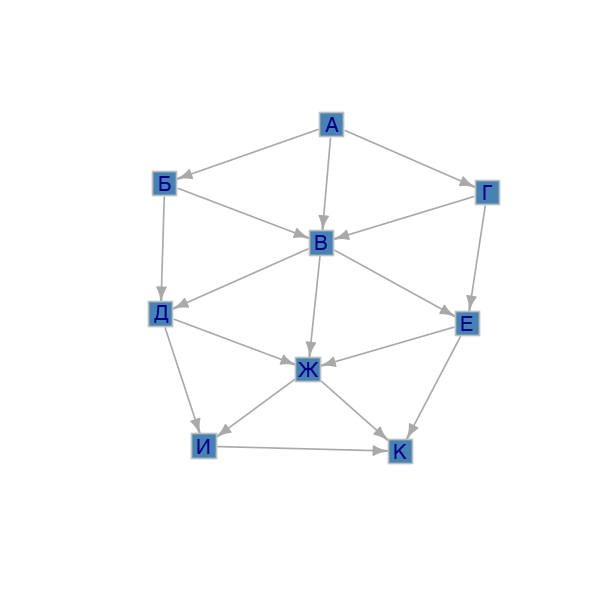

In [69]:
options(warn = -1,repr.plot.width=5,repr.plot.height=5)
edges <- c('А','Б','А','В','А','Г','Б','В','Б','Д',
           'В','Д','В','Е','В','Ж','Г','В','Г','Е',
           'Д','И','Д','Ж','Е','Ж','Е','К',
           'Ж','И','Ж','К','И','К')
g2 <- graph(edges)
plot(g2,
     vertex.color="steelblue",vertex.size=15,
     vertex.frame.color="gray",vertex.shape='square')

In [70]:
paths <- all_simple_paths(g2,'А','К')
paths <- lapply(1:length(paths), function(x) as_ids(paths[[x]]))
paths

[[1]]
[1] "А" "Б" "В" "Д" "Ж" "И" "К"

[[2]]
[1] "А" "Б" "В" "Д" "Ж" "К"

[[3]]
[1] "А" "Б" "В" "Д" "И" "К"

[[4]]
[1] "А" "Б" "В" "Е" "Ж" "И" "К"

[[5]]
[1] "А" "Б" "В" "Е" "Ж" "К"

[[6]]
[1] "А" "Б" "В" "Е" "К"

[[7]]
[1] "А" "Б" "В" "Ж" "И" "К"

[[8]]
[1] "А" "Б" "В" "Ж" "К"

[[9]]
[1] "А" "Б" "Д" "Ж" "И" "К"

[[10]]
[1] "А" "Б" "Д" "Ж" "К"

[[11]]
[1] "А" "Б" "Д" "И" "К"

[[12]]
[1] "А" "В" "Д" "Ж" "И" "К"

[[13]]
[1] "А" "В" "Д" "Ж" "К"

[[14]]
[1] "А" "В" "Д" "И" "К"

[[15]]
[1] "А" "В" "Е" "Ж" "И" "К"

[[16]]
[1] "А" "В" "Е" "Ж" "К"

[[17]]
[1] "А" "В" "Е" "К"

[[18]]
[1] "А" "В" "Ж" "И" "К"

[[19]]
[1] "А" "В" "Ж" "К"

[[20]]
[1] "А" "Г" "В" "Д" "Ж" "И" "К"

[[21]]
[1] "А" "Г" "В" "Д" "Ж" "К"

[[22]]
[1] "А" "Г" "В" "Д" "И" "К"

[[23]]
[1] "А" "Г" "В" "Е" "Ж" "И" "К"

[[24]]
[1] "А" "Г" "В" "Е" "Ж" "К"

[[25]]
[1] "А" "Г" "В" "Е" "К"

[[26]]
[1] "А" "Г" "В" "Ж" "И" "К"

[[27]]
[1] "А" "Г" "В" "Ж" "К"

[[28]]
[1] "А" "Г" "Е" "Ж" "И" "К"

[[29]]
[1] "А" "Г" "Е" "Ж" "К"

[[30]]
[1] "А" "Г" "Е" "К"

In [71]:
answer_dictionary[15] <- toString(length(paths))

## 16.
Укажите через запятую в порядке возрастания все основания систем счисления, 

в которых запись числа 32 оканчивается на 4.

Indicate with separating by commas in ascending order all the bases of number systems, 

in which the record of the number 32 ends with 4.

---

По условию, основания системы счисления должны быть:
 - больше 4,
 - множителями числа 32 - 4 = 28. 

According to the task conditions, the bases of the number systems should be:
  - more than 4,
  - multipliers of the number 32 - 4 = 28. 

In [87]:
result <- ''
for (i in seq(from=10, to=1, by=-1)){
    n <- (32 - 4) / i
    if (as.integer(n) == n & n > 4){
        result <- paste(result,toString(n),sep=",")
    }
}

result <- substr(result,2,nchar(result))
result

[1] "7,14,28"

In [88]:
answer_dictionary[16] <- toString(result)

## 17.
В языке запросов к поисковому серверу для обозначения 
- логической операции $«ИЛИ»$ используется символ $\large{\mid}$, 
- а для логической операции $«И»$ — $\&$. 

В таблице приведено количество страниц, которое находит поисковая система по каждому запросу.

|$\textbf {Запрос}$|$\textbf {Количество найденных страниц}$|
|-:|-:|
|$\textbf {Яблоки}$|$\textbf {7300}$|
|$\textbf {Яблоки} \mid \textbf {Сливы}$|$\textbf {14800}$|
|$\textbf {Яблоки & Сливы}$|$\textbf {1400}$|

Какое количество страниц будет найдено по запросу: $\textbf {Сливы}$?

Считается, что все запросы выполнялись практически одновременно, 

так что набор страниц, содержащих все искомые слова, не изменялся за время выполнения запросов.

---

In the query language to the search server, 
- the symbol $\large{\mid}$ is used to indicate the logical operation $OR$, 
- and for the logical operation $AND$ - $\&$. 

The table shows the number of pages that the search engine finds for each query.

| $\textbf {Request}$ | $\textbf {Number of pages found}$ |
|-:|-:|
| $\textbf {Apples}$| $\textbf {7300}$|
| $\textbf{Apples} \mid \textbf{Plums}$ |$\textbf {14800}$|
| $\textbf {Apples & Plums}$ |$\textbf {1400}$|

How many pages will be found on the query: $\textbf {Plums}$?

It is assumed that all queries were executed almost simultaneously 

so that the set of pages containing all the searched words did not change during the execution of queries.

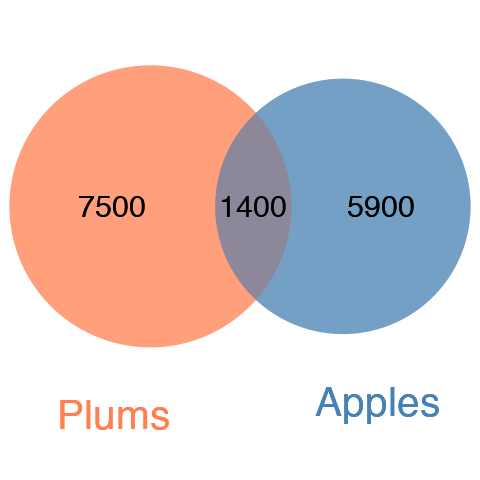

In [94]:
# яблоки + сливы = яблоки_или_сливы + яблоки_и_сливы
# apples + plums = apples_or_plums + apples_and_plums

apples <- 7300; apples_and_plums <- 1400; apples_or_plums <- 14800
plums <- apples_or_plums + apples_and_plums - apples

options(repr.plot.width=4,repr.plot.height=4)
venn.plot <- draw.pairwise.venn(
    area1 = apples, area2 = plums, cross.area = apples_and_plums,
    category = c("Apples", "Plums"),
    fill = c("steelblue", "coral"),
    lty = "blank",
    cex = 1.5, cat.cex = 2, 
    cat.dist = c(0.1, 0.1), cat.pos = c(-10, 10),
    cat.col = c("steelblue", "coral")
);
grid.draw(venn.plot)
grid.newpage();

In [95]:
answer_dictionary[17] <- toString(plums)

## 18.
Для какого целого числа X __ложно__ высказывание:

For what integer X it is a __false__ statement: 

$((X > 1) \to (X > 3)) \lor (X = 3)$?

$(((X > 1) \to (X > 3)) \lor (X = 3)) \equiv FALSE \iff
(((X > 1) \to (X > 3)) \equiv FALSE) \land ((X = 3) \equiv FALSE) ) \iff$

$\iff ((X > 1) \equiv TRUE) \land ((X > 3) \equiv FALSE) \land ((X = 3) \equiv FALSE) \iff$

$\iff ((X > 1) \equiv TRUE) \land ((X < 3) \equiv TRUE) \iff (X = 2) \equiv TRUE$

In [97]:
answer_dictionary[18] <- '2'

## 19.
В программе используется целочисленный массив А с индексами от 0 до 9. 

Значения элементов массива равны $4; 5; 4; 7; 6; 3; 9; 11; 7; 8$ соответственно, т.е. $А [0] = 4; А [1] = 5$ и т.д.

Определите значение переменной k после выполнения следующего фрагмента программы, 

записанной ниже на разных языках программирования.

---

The program uses an integer array A with indices from 0 to 9. 

The values of the array elements are $4; 5; 4; 7; 6; 3; 9; 11; 7; 8$ respectively; $A [0] = 4; A [1] = 5$, and so on.

Determine the value of the variable $k$ after the execution of the next program fragment, 

recorded below in different programming languages.

<table style="width:95%;">
  <tr style="color:slategray;font-size:120%;font-family:'Roboto';">
    <th style="text-align:center;">Python</th> 
    <th style="text-align:center;">R</th>          
  </tr>
  <tr>
    <td style="font-weight:bold;text-align:left;"><pre><code class='python'>
A = [4,5,4,7,6,3,9,11,7,8]
k = 0

for i in range(10): 
    if A[0] < A[i]:
        k += 1
        t = A[i]
        A[i] = A[0]
        A[0] = t   
      
    </code></pre></td> 
    <td style="font-weight:bold;text-align:left;"><pre><code class='r'>
    
A <- c(4,5,4,7,6,3,9,11,7,8)
k <- 0

for (i in 0:9) {
    if (A[1] < A[i+1]){
        k <- k + 1
        t <- A[i+1]
        A[i+1] <- A[1]
        A[1] <- t
    }
}
    </code></pre></td>     
  </tr>    
</table>

In [99]:
A <- c(4,5,4,7,6,3,9,11,7,8)
k <- 0

for (i in 0:9) {
    if (A[1] < A[i+1]){
        k <- k + 1
        t <- A[i+1]
        A[i+1] <- A[1]
        A[1] <- t
    }
}

k

[1] 4

In [100]:
answer_dictionary[19] <- toString(k)

## 20.
Ниже на четырёх языках записан алгоритм. 

Получив на вход число х, этот алгоритм печатает число М. 

Укажите число х, при вводе которого алгоритм печатает 126.

---

Below, in four languages, an algorithm is written. 

After receiving the number x on the input, this algorithm prints the number M. 

Specify the number of x, at input of which the algorithm prints 126.

<table style="width:95%;">
  <tr style="color:slategray;font-size:120%;font-family:'Roboto';">
    <th style="text-align:center;">Python</th> 
    <th style="text-align:center;">R</th>          
  </tr>
  <tr>
    <td style="font-weight:bold;text-align:left;"><pre><code class='python'>
x = int(input())
L, M, y = 0, 0, 7

if x % 2 == 0: 
    y = 9
    
while L < x:
    M += y
    L += 1

print(M)     
    </code></pre></td> 
    <td style="font-weight:bold;text-align:left;"><pre><code class='r'>
    
x <- as.integer(readline())
L <- 0; M <- 0; y <- 7

if (x %% 2 == 0){
    y <- 9
}
    
while (L < x){
    M <- M + y
    L <- L + 1
}

print(M)    
    </code></pre></td>     
  </tr>    
</table>

In [102]:
x <- as.integer(readline())
L <- 0; M <- 0; y <- 7

if (x %% 2 == 0){
    y <- 9
}
    
while (L < x){
    M <- M + y
    L <- L + 1
}

print(M)

14
[1] 126


In [106]:
# расширенная версия программы

for (x in 1:20){
    L <- 0; M <- 0; y <- 7
    
    if (x %% 2 == 0){
        y <- 9
    }
    
    while (L < x){
        M <- M + y
        L <- L + 1
    }
    print(sprintf("x = %i; M = %i",x,M))
}

[1] "x = 1; M = 7"
[1] "x = 2; M = 18"
[1] "x = 3; M = 21"
[1] "x = 4; M = 36"
[1] "x = 5; M = 35"
[1] "x = 6; M = 54"
[1] "x = 7; M = 49"
[1] "x = 8; M = 72"
[1] "x = 9; M = 63"
[1] "x = 10; M = 90"
[1] "x = 11; M = 77"
[1] "x = 12; M = 108"
[1] "x = 13; M = 91"
[1] "x = 14; M = 126"
[1] "x = 15; M = 105"
[1] "x = 16; M = 144"
[1] "x = 17; M = 119"
[1] "x = 18; M = 162"
[1] "x = 19; M = 133"
[1] "x = 20; M = 180"


In [107]:
answer_dictionary[20] <- '14'

## 21.
Определите, при каком наименьшем значении b в результате выполнения следующего алгоритма будет напечатано число 100 

(для Вашего удобства алгоритм представлен на нескольких языках).

---

Determine at what the smallest value of b as a result of the following algorithm will be printed the number 100 

(for your convenience, the algorithm is presented in several languages).

<table style="width:95%;">
  <tr style="color:slategray;font-size:120%;font-family:'Roboto';">
    <th style="text-align:center;">Python</th> 
    <th style="text-align:center;">R</th>          
  </tr>
  <tr>
    <td style="font-weight:bold;text-align:left;"><pre><code class='python'>
def F(x):
    if x % 2 == 0: 
        return 1
    else: 
        return 0
    
a = 100
b = int(input())
k = 0

for t in range(a, b + 1):
    k += F(t)
    
print(k)
    </code></pre></td> 
    <td style="font-weight:bold;text-align:left;"><pre><code class='r'>
    
F <- function(x) {
    if (x %% 2 == 0){
        return(1)
    } else {
        return(0)
    }
}
    
a <- 100
b <- as.integer(readline())
k <- 0

for (t in a:b) {
    k <- k + F(t)
}
    
print(k)      
    </code></pre></td>     
  </tr>    
</table>

In [110]:
F <- function(x) {
    if (x %% 2 == 0){
        return(1)
    } else {
        return(0)
    }
}
    
a <- 100
b <- as.integer(readline())
k <- 0

for (t in a:b) {
    k <- k + F(t)
}
    
print(k)

298
[1] 100


In [109]:
# расширенная версия программы
F <- function(x) {
    if (x %% 2 == 0){
        return(1)
    } else {
        return(0)
    }
}

for (b in 290:310) {
    a <- 100
    k <- 0

    for (t in a:b) {
        k <- k + F(t)
    }
    print(sprintf("b = %i; k = %i", b, k))    
}

[1] "b = 290; k = 96"
[1] "b = 291; k = 96"
[1] "b = 292; k = 97"
[1] "b = 293; k = 97"
[1] "b = 294; k = 98"
[1] "b = 295; k = 98"
[1] "b = 296; k = 99"
[1] "b = 297; k = 99"
[1] "b = 298; k = 100"
[1] "b = 299; k = 100"
[1] "b = 300; k = 101"
[1] "b = 301; k = 101"
[1] "b = 302; k = 102"
[1] "b = 303; k = 102"
[1] "b = 304; k = 103"
[1] "b = 305; k = 103"
[1] "b = 306; k = 104"
[1] "b = 307; k = 104"
[1] "b = 308; k = 105"
[1] "b = 309; k = 105"
[1] "b = 310; k = 106"


Программа подсчитывает количество четных чисел $\geq 100$. Таких чисел будет ровно 100 при $b=298$:

$(298 - 100) / 2 + 1$.

При $b=299$ количество найденных четных чисел также будет равно 100, но $b=299$ не является наименьшим.

---

The program calculates the amount of even numbers $\geq 100$. This amount will be exactly 100 at $b = 298$:

$(298 - 100) / 2 + 1$.

At $b = 299$, the amount of even numbers is also 100, but $b = 299$ is not the smallest.

In [111]:
answer_dictionary[21] <- '298'

## 22.
У исполнителя `Кузнечик` две команды:

1. `прибавь 6`,

2. `прибавь 3`.

Первая из них увеличивает число на экране на 6, вторая — увеличивает его на 3. 

Программа для `Кузнечика` — это последовательность команд. 

Сколько различных чисел можно получить из числа 0 с помощью программы, которая содержит не более 8 команд?

---

The performer `Grasshopper` has two commands:

1. `add 6`,

2. `add 3`.

The first of them increases the number on the screen by 6, the second increases it by 3. 

The program for `Grasshopper` is a sequence of commands. 

How many different numbers can be obtained from the number 0 using a program that contains no more than 8 commands?

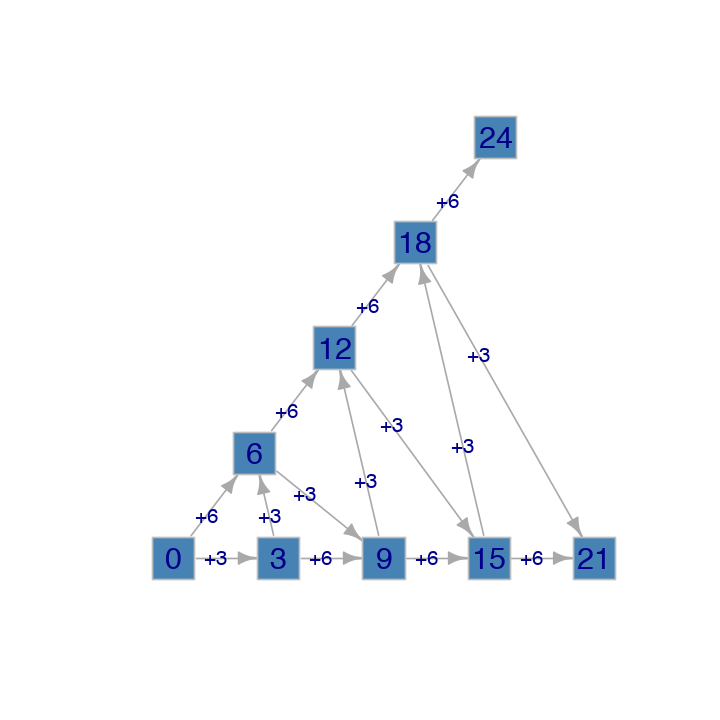

In [117]:
options(repr.plot.width=6,repr.plot.height=6)
edges1 <- c('0','3', '0','6', '3','6', '3','9', '6','9', '6','12',
            '9','12', '9','15', '12','15', '12','18', 
            '15','18', '15','21', '18','21', '18','24')

elabels <- c('+3','+6', '+3','+6', '+3','+6', '+3','+6',
             '+3','+6', '+3','+6', '+3','+6')

g1 <- graph(edges1)

plot(g1,layout=layout_as_tree(g1,circular=TRUE),
     edge.label=elabels,vertex.color="steelblue",
     vertex.size=20,vertex.label.cex=1.5,
     vertex.frame.color="gray",vertex.shape='square')

6 кратно 3, поэтому на каждом этапе программы исполнитель может получить только два числа, 

отличающихся от полученных на предыдущих этапах:

- Первая команда: 0 + 3 = 3; 0 + 6 = 6
- Вторая команда: 0 + 3 + 3 = 6; 0 + 3 + 6 = 9; 0 + 6 + 3 = 9; 0 + 6 + 6 = 12
- Третья команда:  ...

Учитывая стартовое число 0, за 8 этапов можно получить 

1 + 8 * 2 = 17 различных чисел в зависимости от выбора команды на каждом шаге.

---

3 is a multiplier of 6, therefore at each stage of the program the performer can get only two numbers 

that differ from those obtained in the previous stages:

- The first command: 0 + 3 = 3; 0 + 6 = 6
- The second command: 0 + 3 + 3 = 6; 0 + 3 + 6 = 9; 0 + 6 + 3 = 9; 0 + 6 + 6 = 12
- The third command: ...

From the starting number 0, with 8 commands it is possible to get 1 + 8 * 2 = 17 different numbers, 

depending on the choice of the command on each step.

In [113]:
answer_dictionary[22] <- toString(1 + 8 * 2)

## 23.
Сколько существует различных наборов значений логических переменных $x_1, х_2, ... x_9, х_{10}$, 

которые удовлетворяют всем перечисленным ниже условиям?

How many different sets of Boolean variables $x_1, х_2, ... x_9, х_{10}$ exist 

that satisfy all of the following conditions?

$(\neg x_1 \equiv \neg x_2) \lor (\neg x_3 \equiv \neg x_4) = 1$

$(\neg x_3 \equiv \neg x_4) \lor (\neg x_5 \equiv \neg x_6) = 1$

$(\neg x_5 \equiv \neg x_6) \lor (\neg x_7 \equiv \neg x_8) = 1$

$(\neg x_7 \equiv \neg x_8) \lor (\neg x_9 \equiv \neg x_{10}) = 1$


В ответе __не нужно__ перечислять все различные наборы значений $x_1, х_2, ... x_9, х_{10}$, при которых выполнена данная система равенств.

В качестве ответа вам нужно указать количество таких наборов.

The answer __does not need__ to list all the different sets of values $x_1, х_2, ... x_9, х_{10}$ under which this system of equations is satisfied. 

As an answer, you need to specify only the number of such sets.

1) 

Упростим систему логических уравнений. / Let's simplify the logical equations.

$( \ (\neg x_1 \equiv \neg x_2) \lor (\neg x_3 \equiv \neg x_4) = 1 \ )  \iff
( \ (x_1 \equiv x_2) \lor (x_3 \equiv x_4) = 1 \ \iff
\neg ( x_1 \equiv x_2) \land \neg (x_3 \equiv x_4) = 0$

2) 

Система будет иметь вид: / The system of equations will be:

$ \neg ( x_1 \equiv x_2) \land \neg (x_3 \equiv x_4) = 0$  **(1)**

$ \neg ( x_3 \equiv x_4) \land \neg (x_5 \equiv x_6) = 0$  **(2)**

$ \neg ( x_5 \equiv x_6) \land \neg (x_7 \equiv x_8) = 0$  **(3)**

$ \neg ( x_7 \equiv x_8) \land \neg (x_8 \equiv x_{10}) = 0$  **(4)**


3) Количество бинарных комбинаций из 10 цифр: / The number of binary combinations from 10 digits:

$2^{10}=1024$

4) 

Тождество $(1)$ нарушается, только если $x_1 \neq x_2$ и $x_3 \neq x_4$ одновременно, 

то есть необходимо исключить 4 набора переменных, в которых $(x_1, x_2, x_3, x_4)$ имеют вид (0,1,0,1), (0,1,1,0), (1,0,0,1), (1,0,1,0). 

Таких наборов (с учетом комбинаций остальных 6 переменных) будет: $4*2^{6}$. 

При этом возможных наборов сочетаний $(x_1, x_2, x_3, x_4)$ остается только 16 - 4 = 12: (0,0,0,1), (1,1,0,1), и т.д.

The identity $(1)$ is violated only if $x_1 \neq x_2$ and $x_3 \neq x_4$ simultaneously, 

so it is necessary to exclude 4 sets of variables in which $(x_1, x_2, x_3, x_4)$ have the form (0,1,0,1), (0,1,1,0), (1,0,0,1), (1,0,1,0). 

This kind of sets (taking into account combinations of the remaining 6 variables) will be $4 * 2 ^ {6}$. 

In this case, we have less possible combinations $(x_1, x_2, x_3, x_4)$ - only 16 - 4 = 12: (0,0,0,1), (1,1,0,1), etc.

5) 

Тождество $(2)$ нарушается, только если $x_3 \neq x_4$ и $x_5 \neq x_6$ одновременно, 

то есть необходимо исключить 4 набора переменных, в которых $(x_3, x_4, x_5, x_6)$ имеют вид (0,1,0,1), (0,1,1,0), (1,0,0,1), (1,0,1,0). 

$(x_7, x_8, x_9, x_{10})$ принимают любые значения (количество их комбинаций равно $2^4$), 

а $(x_1, x_2)$ может иметь только 2 варианта (0,0) и (1,1), учитывая пункт 4). 

Всего тождество $(2)$ могут нарушить: $2 * 4 * 2^{4}$ набора.

The identity $(2)$ is violated only if $x_3 \neq x_4$ and $x_5 \neq x_6$ simultaneously, 

so it is necessary to exclude 4 sets of variables in which $(x_3, x_4, x_5, x_6)$ have the form (0,1,0,1), (0,1,1,0), (1,0,0,1), (1,0,1,0). 

$(x_7, x_8, x_9, x_{10})$ takes any values (the number of their combinations is $2 ^ 4$), 

and $(x_1, x_2)$ can have only 2 combinations (0,0) and (1,1), taking into account point 4). 

In total, the identity $ (2) $ can be violated by: $2 * 4 * 2^{4}$ sets.

6) 

Тождество $(3)$ нарушается, только если $x_5 \neq x_6$ и $x_7 \neq x_8$ одновременно, 

то есть необходимо исключить 4 набора переменных, в которых $(x_5, x_6, x_7, x_8)$ имеют вид (0,1,0,1), (0,1,1,0), (1,0,0,1), (1,0,1,0). 

$(x_3, x_4)$ может иметь только 2 варианта (0,0) и (1,1), учитывая пункт 5). 

При этом переменные $(x_1, x_2)$ могут иметь все 4 возможных варианта сочетаний и переменные $(x_9, x_{10})$ аналогично. 

Всего тождество $(3)$ могут нарушить: $4 * 2 * 4 * 4$ набора.

The identity $(3)$ is violated only if $ x_5 \neq x_6 $ and $ x_7 \neq x_8 $ simultaneously, 

so it is necessary to exclude 4 sets of variables in which $(x_5, x_6, x_7, x_8)$ have the form (0,1,0,1), (0,1,1,0), (1,0,0,1), (1,0,1,0). 

$(x_3, x_4)$ can have only 2 variants (0,0) and (1,1), taking into account point 5). 

In this case, the variables $(x_1, x_2)$ can have all 4 possible variants of combinations and the variables $(x_9, x_{10})$ are similar. 

In total, the identity $(3)$ can be violated by: $4 * 2 * 4 * 4$ sets.

7) 

Тождество $(4)$ нарушается, только если $x_7 \neq x_8$ и $x_9 \neq x_{10}$ одновременно, 

то есть необходимо исключить 4 набора переменных, в которых $(x_7, x_8, x_9, x_{10})$ имеют вид (0,1,0,1), (0,1,1,0), (1,0,0,1), (1,0,1,0). 

$(x_5, x_6)$ = (0,0) или (1,1), учитывая пункт 6). 

При этом переменные $(x_1, x_2, x_3, x_4)$ имеют только 12 вариантов изменений, учитывая пункт 4). 

Всего тождество $(4)$ могут нарушить: $12 * 2 * 4$ набора.

The identity $(4)$ is violated only if $x_7 \neq x_8 $ and $ x_9 \neq x_{10}$ simultaneously, 

so you need to exclude 4 sets of variables in which $(x_7, x_8, x_9, x_{10})$ have the form (0,1,0,1), (0,1,1,0), (1,0,0,1), (1,0,1,0). 

$(x_5, x_6)$ = (0,0) or (1,1), taking into account point 6). 

In this case, the variables $(x_1, x_2, x_3, x_4)$ have only 12 variants of changes, taking into account point 4). 

In total, the identity $(4)$ can be violated by $12 * 2 * 4$ sets.

In [122]:
2 ** 10 - 4 * 2 ** 6 - 2 * 4 * 2 ** 4 - 4 * 2 * 4 * 4 - 12 * 2 * 4

[1] 416

In [121]:
# check the decision method
bc <- bincombinations(10)
c <- 0
n <- length(bc)/10
for (i in 1:n){
    el <- bc[i,]
    e1 <- (!el[1] == !el[2]) | ( !el[3] == !el[4])
    e2 <- (!el[3] == !el[4]) | ( !el[5] == !el[6])
    e3 <- (!el[5] == !el[6]) | ( !el[7] == !el[8])
    e4 <- (!el[7] == !el[8]) | ( !el[9] == !el[10])
    result <- (e1 == 1) & (e2 == 1) & (e3 == 1) & (e4 == 1)
    if (result == 1) {c = c + 1}
}
c

[1] 416

In [119]:
answer_dictionary[23] <- toString(c)

## Часть 2 &nbsp; &nbsp; &nbsp; Part 2

## 24.
<div style="width: 800px; height: 920px; overflow:auto;">
    <img src="it_images/2017_02_24.png" width="800" height="920"/>
</div>
Требовалось написать программу, которая вводит с клавиатуры координаты точки на плоскости (х, у — действительные числа) 

и определяет принадлежность точки заштрихованной области. 

Программист торопился и написал программу неправильно.

Последовательно выполните следующее:

1. Приведите пример таких чисел х, у при которых программа работает неправильно.

2. Укажите, как нужно доработать программу, чтобы не было случаев её неправильной работы. 

(Это можно сделать несколькими способами, поэтому можно указать любой способ доработки исходной программы).

<table style="width:95%;">
  <tr style="color:slategray;font-size:120%;font-family:'Roboto';">
    <th style="text-align:center;">Python</th> 
    <th style="text-align:center;">R</th>          
  </tr>
  <tr>
    <td style="font-weight:bold;text-align:left;"><pre><code class='python'>
    
x = float(input("x "))
y = float(input("y "))

if y <= -x &#42; x:
    if y <= 0:
        if y >= -x - 2:
            print('принадлежит')
        else:
            print('не принадлежит')
            
    </code></pre></td> 
    <td style="font-weight:bold;text-align:left;"><pre><code class='r'>
    
x <- as.numeric(readline("x "))
y <- as.numeric(readline("y "))

if (y <= -x &#42; x) {
    if (y <= 0) {
        if (y >= -x - 2){
            print('принадлежит')
        } else {
            print('не принадлежит')
        }
    }
}
    </code></pre></td>     
  </tr>    
</table>

It was required to write a program that enters from the keyboard the coordinates of the point on the plane (x, y are real numbers) 

and determines the belonging of the point to the shaded region. 

The programmer was in a hurry and wrote the program incorrectly.

Do the following sequentially:

1. Give an example of such numbers x, y for which the program does not work correctly.

2. Indicate how you need to refine the program so that there are no cases of its improper operation. 

(This can be done in several ways, so you can specify any way to refine the source program).

**Note**: `принадлежит`=`belongs`; `не принадлежит`=`does not belong`.

Работает некорректно, если не выполнены условия $y \leq -x*x$ или $y \leq 0$. 

&#9881; Например, для (-2,-3).

It works incorrectly if the conditions $y \leq -x * x$ or $y \leq 0$ are not satisfied. 

&#9881; For example, for (-2, -3).

In [124]:
# the wrong variant, the wrong answer
x <- as.numeric(readline("x "))
y <- as.numeric(readline("y "))

if (y <= -x * x) {
    if (y <= 0) {
        if (y >= -x - 2){
            print('принадлежит')
        } else {
            print('не принадлежит')
        }
    }
}

x -2
y -3


In [125]:
# the right variant, the right answer
x <- as.numeric(readline("x "))
y <- as.numeric(readline("y "))

if (((y <= -x * x) | ((y <= 0) & (y > -x * x))) & (y >= -x - 2)) {
    print('принадлежит')
} else {
    print('не принадлежит')
}

x -2
y -3
[1] "не принадлежит"


In [126]:
answer_dictionary[24] <-'1.(-2,-3); 2. if (((y <= -x * x) | ((y <= 0) & (y > -x * x))) & (y >= -x - 2))'

## 25.
Дан вещественный массив из 40 элементов. Элементы массива могут принимать произвольные значения. 

Опишите на русском языке или на одном из языков программирования алгоритм, 

который находит и выводит минимальный положительный элемент массива или сообщение, что такого элемента нет.

Исходные данные объявлены так, как показано ниже. 

Запрещается использовать переменные, не описанные ниже, но разрешается не использовать часть из них.

- Объявляем массив А из 40 элементов.

- Объявляем целочисленные переменные I, J, и вещественную переменную MIN.

- В цикле от 1 до 40 вводим элементы массива А с 1-го по 40-й.

- ...

В качестве ответа вам необходимо привести фрагмент программы (или описание алгоритма на естественном языке), который должен находиться на месте многоточия. 

Вы можете записать решение также на другом языке программирования (укажите название и используемую версию языка программирования, например `Borland Pascal 7.0`) или в виде блок-схемы. 

В этом случае вы должны использовать те же самые исходные данные и переменные, какие были предложены в условии (например, в образце, записанном на естественном языке).

<table style="width:95%;">
  <tr style="color:slategray;font-size:120%;font-family:'Roboto';">
    <th style="text-align:center;">Python</th> 
    <th style="text-align:center;">R</th>          
  </tr>
  <tr>
    <td style="font-weight:bold;text-align:left;"><pre><code class='python'>
N = 40
A = []
# use integer variables I,J and a real variable MIN
       
for I in range(N):
    A.append(float(input()))
...
    </code></pre></td> 
    <td style="font-weight:bold;text-align:left;"><pre><code class='r'> 
    
N <- 40
A <- vector(length=N)
#use integer variables I,J and a real variable MIN
       
for (I in 1:N){
    A[I] <- as.numeric(readline())
...
}
    </code></pre></td>     
  </tr>    
</table>

A real array of 40 elements is given. Array elements can take arbitrary values. 

Describe in the Russian / English language or in one of the programming languages an algorithm 

that finds and displays the minimum positive element of the array or a message that there is no such element.

The original data is declared as shown below. 

It is forbidden to use variables not described below, but it is allowed not to use part of them.

- Declare an array A of 40 elements.

- Declare the integer variables I, J, and the real variable MIN.

- In the cycle from 1 to 40, the elements of array A are entered from the 1st to the 40th.

- ...

As an answer, you need to bring the program fragment (or description of the algorithm in the natural language), which should be in place of the ellipsis. 

You can also write the solution in another programming language (specify the name and the version of the programming language used: for example, `Borland Pascal 7.0`) or as a flowchart. 

In this case, you must use the same source data and variables that were proposed in the condition (for example, in a sample written in the natural language).

In [128]:
version <- R.version.string

In [130]:
N <- 40
A <- vector(length=N)
MIN <- 10**100
       
for (I in 1:N){
    A[I] <- as.numeric(readline())
# The fragment instead of the ellipsis
    if ((A[I] > 0) & (A[I] < MIN)) {
        MIN <- A[I]
    }
}

if (MIN == 10**100){
    print('There are no positive numbers in the array')
} else {
    print(MIN)
}            

209
4839
-1039
-0.9
0.05
2938.4
-0.01
394.2
9483
-3092.34
-5948
-18273
-0.002
934.5847
-3940234
29384
584736
93.45
11
20394
3948.54
-20394
-304.45
-5847
-203945
94837
9.2
4573.4
-203
-4
1.2
4837
9023
45839
8574
8.4
-34092
8475.5948
22.342
-4596988
[1] 0.05


In [131]:
program_fragment <- "
N <- 40
A <- vector(length=N)
MIN <- 10**100
       
for (I in 1:N){
    A[I] <- as.numeric(readline())
# The fragment instead of the ellipsis
    if ((A[I] > 0) & (A[I] < MIN)) {
        MIN <- A[I]
    }
}

if (MIN == 10**100){
    print('There are no positive numbers in the array')
} else {
    print(MIN)
}            
"

In [132]:
answer_dictionary[25] <- paste(version, program_fragment, sep=";")

## 26.
Два игрока играют в следующую игру. На координатной плоскости в точке (1,0) стоит фишка. Игроки ходят по очереди. 

Ход состоит в том, что игрок перемещает фишку из точки с координатами (x, у) в одну из трёх точек: 

- в точку с координатами (х + 3, у), 
- в точку (х, у + 3),
- в точку (x + 3, у + 3). 

Выигрывает игрок, после хода которого, расстояние по прямой от фишки до точки с координатами (0, 0) не меньше 13 единиц. 

Кто выигрывает при безошибочной игре обоих игроков — игрок, делающий первый ход, или игрок, делающий второй ход? 

Какими должны быть ходы выигрывающего игрока? Ответ обоснуйте.

---

Two participants play the next game. On the coordinate plane at the point (1,0) there is a game chip. Players move the chip by turns. 

One action consists in the fact that the participant moves the chip from the point with the coordinates (x, y) to one of three points: 

- to the point with the coordinates (x + 3, y), 
- to the point (x, y + 3), 
- to the point (x + 3, y + 3). 

The player wins, if after his move the distance from the chip to the point with coordinates (0, 0) is not less than 13 units. 

Who wins with an unmistakable game of both participants - the player making the first move, or the player making the second move? 

What should be the moves of the winning player? Justify the answer.

Побеждает II игрок. / The second player wins.

Его выигрышная стратегия: / His winning strategy:

I: $(1,0)-1 \to (4,0)-4 \; (x + 3) \lor (1,0)-1 \to (1,3)-3.2 \; (y + 3) \lor (1,0)-1 \to (4,3)-5 \; (x + 3, y + 3)$.

II: $(4,0)-4 \to (7,3)-7.6 \; (x + 3, y + 3) \lor (1,3)-3.2 \to (4,6)-7.2 \; (x + 3, y + 3) \lor (4,3)-5 \to (7,3)-7.6 \; (x + 3)$

I: 

$(7,3)-7.6 \to (10,3)-10.4 \; (x + 3) \lor (7,3)-7.6 \to (7,6)-9.2 \; (y + 3) \lor (7,3)-7.6 \to (10,6)-11.7 \; (x + 3, y + 3)$.

$\lor$

$(4,6)-7.2 \to (7,6)-9.2 \; (x + 3) \lor (4,6)-7.2 \to (4,9)-9.8 \; (y + 3) \lor (4,6)-7.2 \to (7,9)-11.4 \; (x + 3, y + 3)$.

II: 

$(4,9)-9.8 \to (7,12)-13.9 \; (x + 3, y + 3) \lor (7,6)-9.2 \to (10,9)-13.5 \; (x + 3, y + 3) \lor$

$(7,9)-11.4 \to (10,12)-15.6 \; (x + 3, y + 3) \lor (10,3)-10.4 \to (13,6)-14.3 \; (x + 3, y + 3) \lor$

$(10,6)-11.7 \to (13,9)-15.8$

Граф соответствует дереву игры. / The graph corresponds to the game tree.

На рёбрах дерева указывано, кто делает ход, в узлах — позиция игры и расстояние до (0, 0).

The edges of the tree indicate who is making the move, the nodes - a position of the game and a distance to (0, 0).

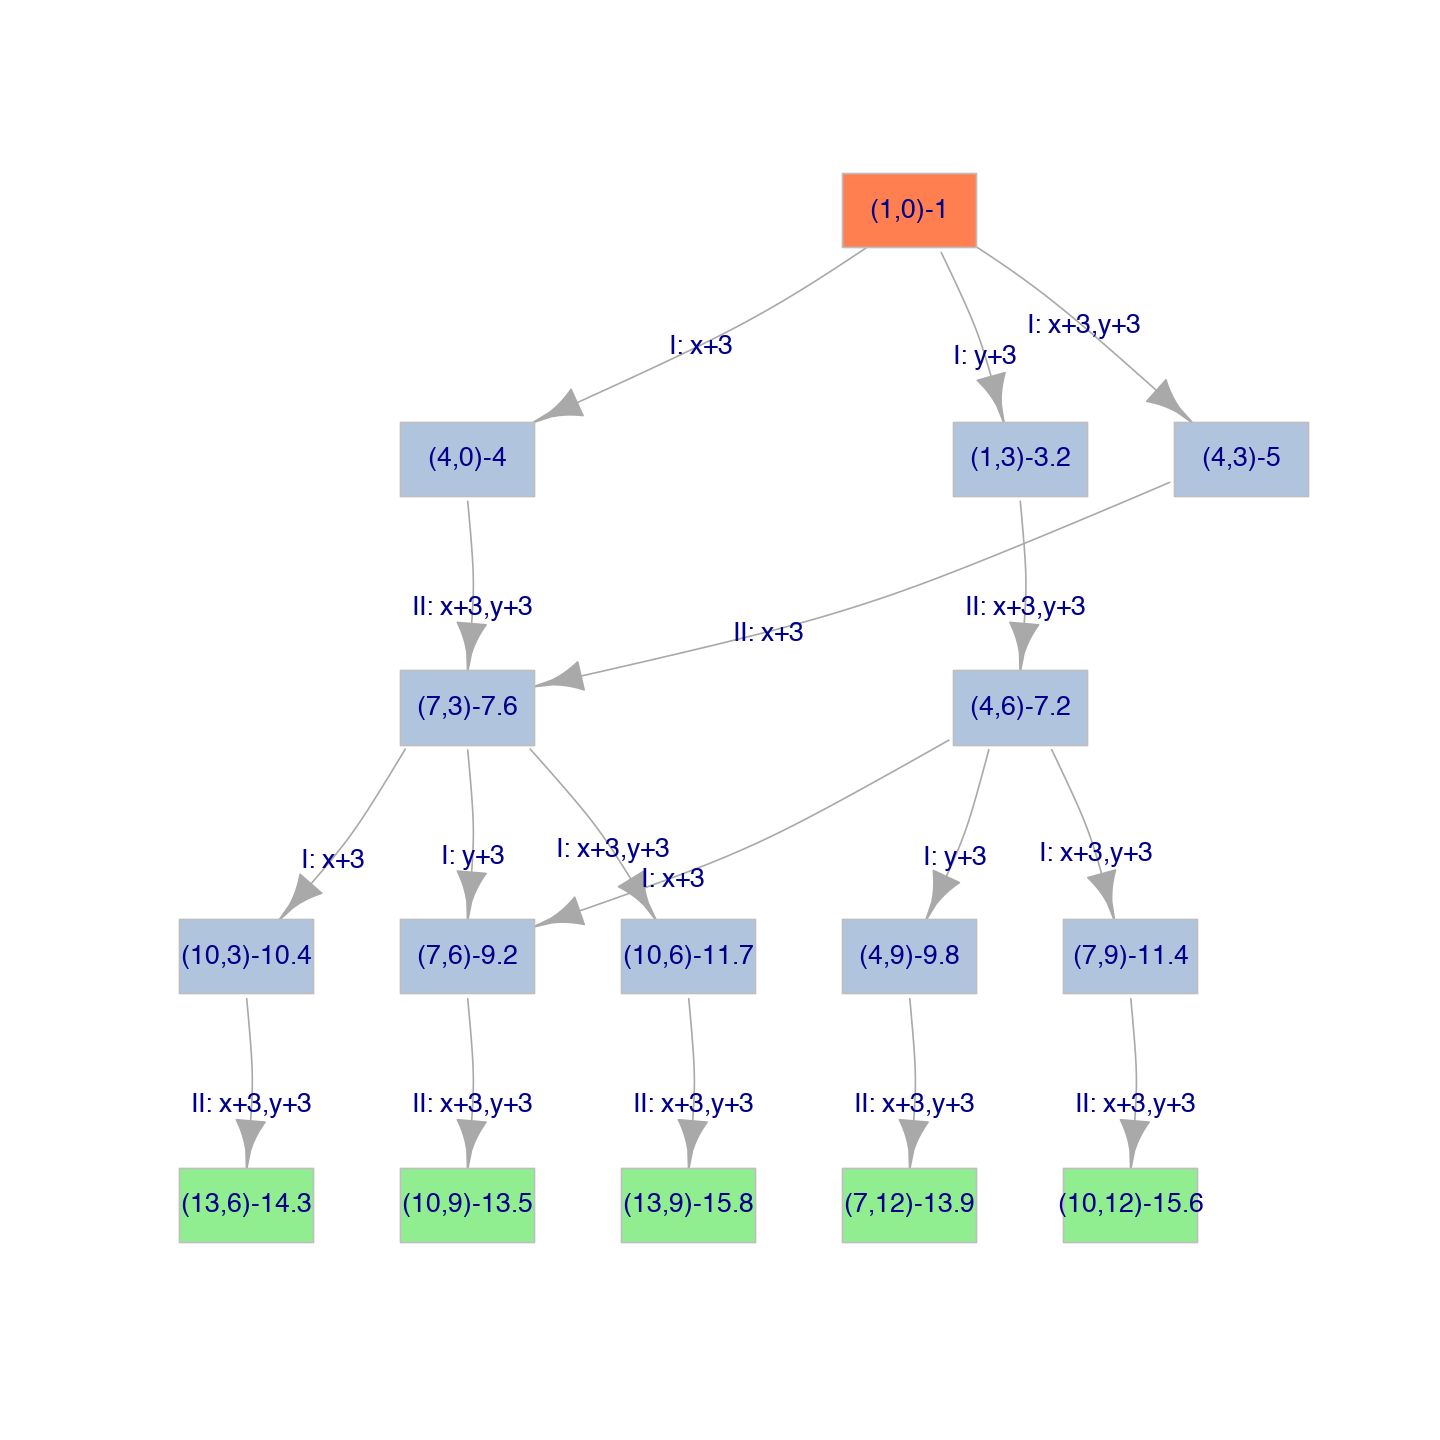

In [167]:
options(repr.plot.width=12,repr.plot.height=12)

edges3 <- c('(1,0)-1','(4,0)-4', '(1,0)-1','(1,3)-3.2', '(1,0)-1','(4,3)-5',
            '(4,0)-4','(7,3)-7.6', '(1,3)-3.2','(4,6)-7.2', '(4,3)-5','(7,3)-7.6',
            '(7,3)-7.6','(10,3)-10.4', '(7,3)-7.6','(7,6)-9.2', '(7,3)-7.6','(10,6)-11.7',
            '(4,6)-7.2','(7,6)-9.2', '(4,6)-7.2','(4,9)-9.8', '(4,6)-7.2','(7,9)-11.4',
            '(4,9)-9.8','(7,12)-13.9', '(7,6)-9.2','(10,9)-13.5', '(7,9)-11.4','(10,12)-15.6',
            '(10,3)-10.4','(13,6)-14.3', '(10,6)-11.7','(13,9)-15.8')

colors3 <-c ("coral","lightsteelblue","lightsteelblue","lightsteelblue",
             "lightsteelblue","lightsteelblue","lightsteelblue","lightsteelblue",
             "lightsteelblue","lightsteelblue","lightsteelblue","lightgreen",
             'lightgreen',"lightgreen","lightgreen","lightgreen")

labels3 <- c('I: x+3','I: y+3','I: x+3,y+3','II: x+3,y+3','II: x+3,y+3','II: x+3',
             'I: x+3','I: y+3','I: x+3,y+3','I: x+3','I: y+3','I: x+3,y+3',
             'II: x+3,y+3','II: x+3,y+3','II: x+3,y+3','II: x+3,y+3','II: x+3,y+3')

g3 <- graph(edges3)

plot(g3,layout=layout_as_tree,
     edge.label=labels3,edge.label.cex=1.3,edge.curved=0.1,
     vertex.color=colors3,vertex.size=27,vertex.label.cex=1.3,
     vertex.frame.color="gray",vertex.shape='rectangle');

In [169]:
answer1 <- 'The second player.' 
answer2 <- 'The winning strategy: 
if the first step of the first player is (x+3, y+3) => 
the second player moves (x+3, y) after that 
and moves (x+3, y+3) in other cases.'

In [170]:
answer_dictionary[26] <- paste(answer1, answer2, sep=" ")

## 27.

## Ответы &nbsp; &nbsp; &nbsp; Answers

In [171]:
answer_dictionary

<hash> containing 25 key-value pair(s).
  1 : 11010110
  10 : 243
  11 : 21
  12 : EADCGBF
  13 : 180
  15 : 30
  16 : 7,14,28
  17 : 8900
  18 : 2
  19 : 4
  2 : 34
  20 : 14
  21 : 298
  22 : 17
  23 : 416
  24 : 1.(-2,-3); 2. if (((y <= -x * x) | ((y <= 0) & (y > -x * x))) & (y >= -x - 2))
  25 : R version 3.4.1 Patched (2017-06-30 r72871);
N <- 40
A <- vector(length=N)
MIN <- 10**100
       
for (I in 1:N){
    A[I] <- as.numeric(readline())
# The fragment instead of the ellipsis
    if ((A[I] > 0) & (A[I] < MIN)) {
        MIN <- A[I]
    }
}
if (MIN == 10**100){
    print('There are no positive numbers in the array')
} else {
    print(MIN)
}            
  26 : The second player. The winning strategy: 
if the first step of the first player is (x+3, y+3) => 
the second player moves (x+3, y) after that 
and moves (x+3, y+3) in other cases.
  3 : 2
  4 : 5
  5 : CDBACED
  6 : BC
  7 : =$B2+D$2
  8 : 127
  9 : 1